<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [101]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

### Initial analysis

In [106]:
# Load the data
house = pd.read_csv('./housing.csv')

In [107]:
pd.set_option('display.max_columns', 200)

In [108]:
house.shape

(1460, 81)

In [109]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Splitting the data into the fixed and renovatable characteristics

In [110]:
house.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

### Any feature not associated with condition, quality, finish as well as external attributes such as driveway material, fencing, roofing, heating etc are deemed to be fixed

In [111]:
# temp cell to remove features as required
fixedcol = [u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle',
       u'YearBuilt', u'YearRemodAdd',
        
        u'Foundation',
       u'BsmtExposure', u'BsmtFinSF1',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'1stFlrSF',
       u'2ndFlrSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'TotRmsAbvGrd',
       u'Fireplaces', u'GarageType', u'GarageYrBlt',
       u'GarageCars', u'GarageArea',
       u'PavedDrive', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea',
       u'MiscFeature', u'MiscVal', u'MoSold', u'YrSold', u'SaleType',
       u'SaleCondition', u'SalePrice']

In [112]:
# dataframe of fixed features
housef = house[fixedcol]

In [113]:
housef.shape

(1460, 53)

In [115]:
# dataframe of renovatable features
houser = house.drop(fixedcol, axis=1)

In [116]:
# adding year sold and price variables to renovatable features dataframe
houser = pd.concat([house['YrSold'],houser],axis=1)

In [117]:
houser = pd.concat([house['SalePrice'],houser],axis=1)

In [118]:
houser.shape

(1460, 30)

### Total columns across both housef (fixed) and houser (renovatable) add to 81 + 2 so all good for now

### Beginning EDA on the fixed features

In [119]:
housef.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
YearBuilt          int64
YearRemodAdd       int64
Foundation        object
BsmtExposure      object
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageType        object
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
PavedDrive        object


In [120]:
housef.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,Foundation,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460,1422,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379,1379.000000,1460.000000,1460.000000,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,PConc,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Attchd,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,647,953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,870,NaN,NaN,NaN,1340,NaN,NaN,NaN,NaN,NaN,NaN,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1971.267808,1984.865753,NaN,NaN,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,NaN,1978.506164,1.767123,472.980137,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.202904,20.645407,NaN,NaN,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,NaN,24.689725,0.747315,213.804841,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1872.000000,1950.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,NaN,1900.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1954.000000,1967.000000,NaN,NaN,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,NaN,1961.000000,1.000000,334.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1973.000000,1994.000000,NaN,NaN,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,NaN,1980.000000,2.000000,480.000000,NaN,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.000000,2004.000000,NaN,NaN,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,0.0

In [121]:
housef.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
YearBuilt           0
YearRemodAdd        0
Foundation          0
BsmtExposure       38
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
1stFlrSF            0
2ndFlrSF            0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageType         81
GarageYrBlt        81
GarageCars          0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea  

### Doing some initial feature engineering based on comments listed below

In [122]:
# miscfeature is to be dropped as only a small number of houses have alternative features
# alley is to be reclassified as many houses dont have alleys
# lotfrontage 'NA' is to be reclassified as 0, ie there is no street area facing the house
# leave out processing basement attributes for now, to consider dropping later if required
# leave out processing garage related attributes for now, to consider dropping later if required

In [123]:
housef['LotFrontage'] = housef['LotFrontage'].fillna(0)
housef['LotFrontage'].isnull().sum()

C:\Users\arb_b\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0

In [124]:
housef.drop(columns='MiscFeature',axis=1,inplace=True)
housef.shape

C:\Users\arb_b\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(1460, 52)

In [125]:
house.sort_values(['YearBuilt'], ascending=True).head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1349,1350,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,8,5,1872,1987,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,TA,Fa,No,LwQ,259,Unf,0,425,684,OthW,Fa,N,SBrkr,938,1215,205,2358,0,0,2,0,4,1,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,54,20,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,122000
1137,1138,50,RL,54.0,6342,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1.5Fin,5,8,1875,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0,Unf,0,780,780,GasA,Gd,N,SBrkr,780,240,0,1020,0,0,1,0,2,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,176,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,94000
747,748,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,7,1880,2003,Mansard,CompShg,Stucco,Stucco,None,0.0,Gd,TA,Stone,TA,Fa,No,Unf,0,Unf,0,1240,1240,GasW,TA,N,SBrkr,1320,1320,0,2640,0,0,1,1,4,1,Gd,8,Typ,1,Gd,Detchd,1950.0,Unf,4,864,TA,TA,N,181,0,386,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,265979
304,305,75,RM,87.0,18386,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2.5Fin,7,9,1880,2002,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,1470,1470,GasA,Ex,Y,SBrkr,1675,1818,0,3493,0,0,3,0,3,1,Gd,10,Typ,1,Ex,Attchd,2003.0,Unf,3,870,TA,TA,Y,302,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,295000
1132,1133,70,RM,90.0,9900,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,6,4,1880,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1008,1008,GasW,TA,Y,SBrkr,1178,1032,0,2210,0,0,2,0,5,1,Fa,8,Typ,0,NaN,Detchd,1930.0,Unf,1,205,Fa,TA,N,0,48,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,117500


In [126]:
# converting the year values by subtracting 1872 from them (as this is the year the oldest house was built)
# this is in effect to do some scaling of the data
housef['YearBuilt'] = housef['YearBuilt'] - 1872
housef['GarageYrBlt'] = housef['GarageYrBlt'] - 1872
housef['GarageYrBlt'] = housef['GarageYrBlt'].fillna(0)
housef['YearRemodAdd'] = housef['YearRemodAdd'] - 1872

C:\Users\arb_b\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\arb_b\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\arb_b\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [127]:
housef.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,Foundation,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,127,128,PConc,No,0,0,953,953,953,694,1647,0,0,2,1,3,1,7,1,Attchd,127.0,2,460,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,106,116,CBlock,No,790,163,589,1542,2073,0,2073,1,0,2,0,3,1,7,2,Attchd,106.0,2,500,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,69,134,Stone,No,275,0,877,1152,1188,1152,2340,0,0,2,0,4,1,9,2,Attchd,69.0,1,252,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,78,124,CBlock,Mn,49,1029,0,1078,1078,0,1078,1,0,1,0,2,1,5,0,Attchd,78.0,1,240,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125
1459,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,93,93,CBlock,No,830,290,136,1256,1256,0,1256,1,0,1,1,3,1,6,0,Attchd,93.0,1,276,Y,736,68,0,0,0,0,0,6,2008,WD,Normal,147500


### Selecting some sample features to be used in the initial model

### No distinction was made in relation to possible 'non-residential' houses

In [128]:
housef.columns

Index([u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street',
       u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig',
       u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2',
       u'BldgType', u'HouseStyle', u'YearBuilt', u'YearRemodAdd',
       u'Foundation', u'BsmtExposure', u'BsmtFinSF1', u'BsmtFinSF2',
       u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF', u'2ndFlrSF', u'GrLivArea',
       u'BsmtFullBath', u'BsmtHalfBath', u'FullBath', u'HalfBath',
       u'BedroomAbvGr', u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces',
       u'GarageType', u'GarageYrBlt', u'GarageCars', u'GarageArea',
       u'PavedDrive', u'WoodDeckSF', u'OpenPorchSF', u'EnclosedPorch',
       u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal', u'MoSold',
       u'YrSold', u'SaleType', u'SaleCondition', u'SalePrice'],
      dtype='object')

In [129]:
# selecting numerical features for use as part of the first feature selection
tempfeat1 = [x for x in housef.columns if housef[x].dtype != object]
tempfeat1

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [130]:
# setting aside non-numerical variables for later analysis
tempfeat2 = [x for x in housef.columns if housef[x].dtype == object]
tempsalep = house[['SalePrice']]
tempfeat2df = housef[tempfeat2]
#tempsalep
housefv2 = pd.concat([tempfeat2df,tempsalep], axis=1)
housefv2.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,Foundation,BsmtExposure,GarageType,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,PConc,No,Attchd,Y,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,CBlock,Gd,Attchd,Y,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,PConc,Mn,Attchd,Y,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,BrkTil,No,Detchd,Y,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,PConc,Av,Attchd,Y,WD,Normal,250000


In [131]:
housefv2.shape

(1460, 20)

In [132]:
# initial df using only numerical attributes for now
housefv1 = housef[tempfeat1]
housefv1.shape

(1460, 33)

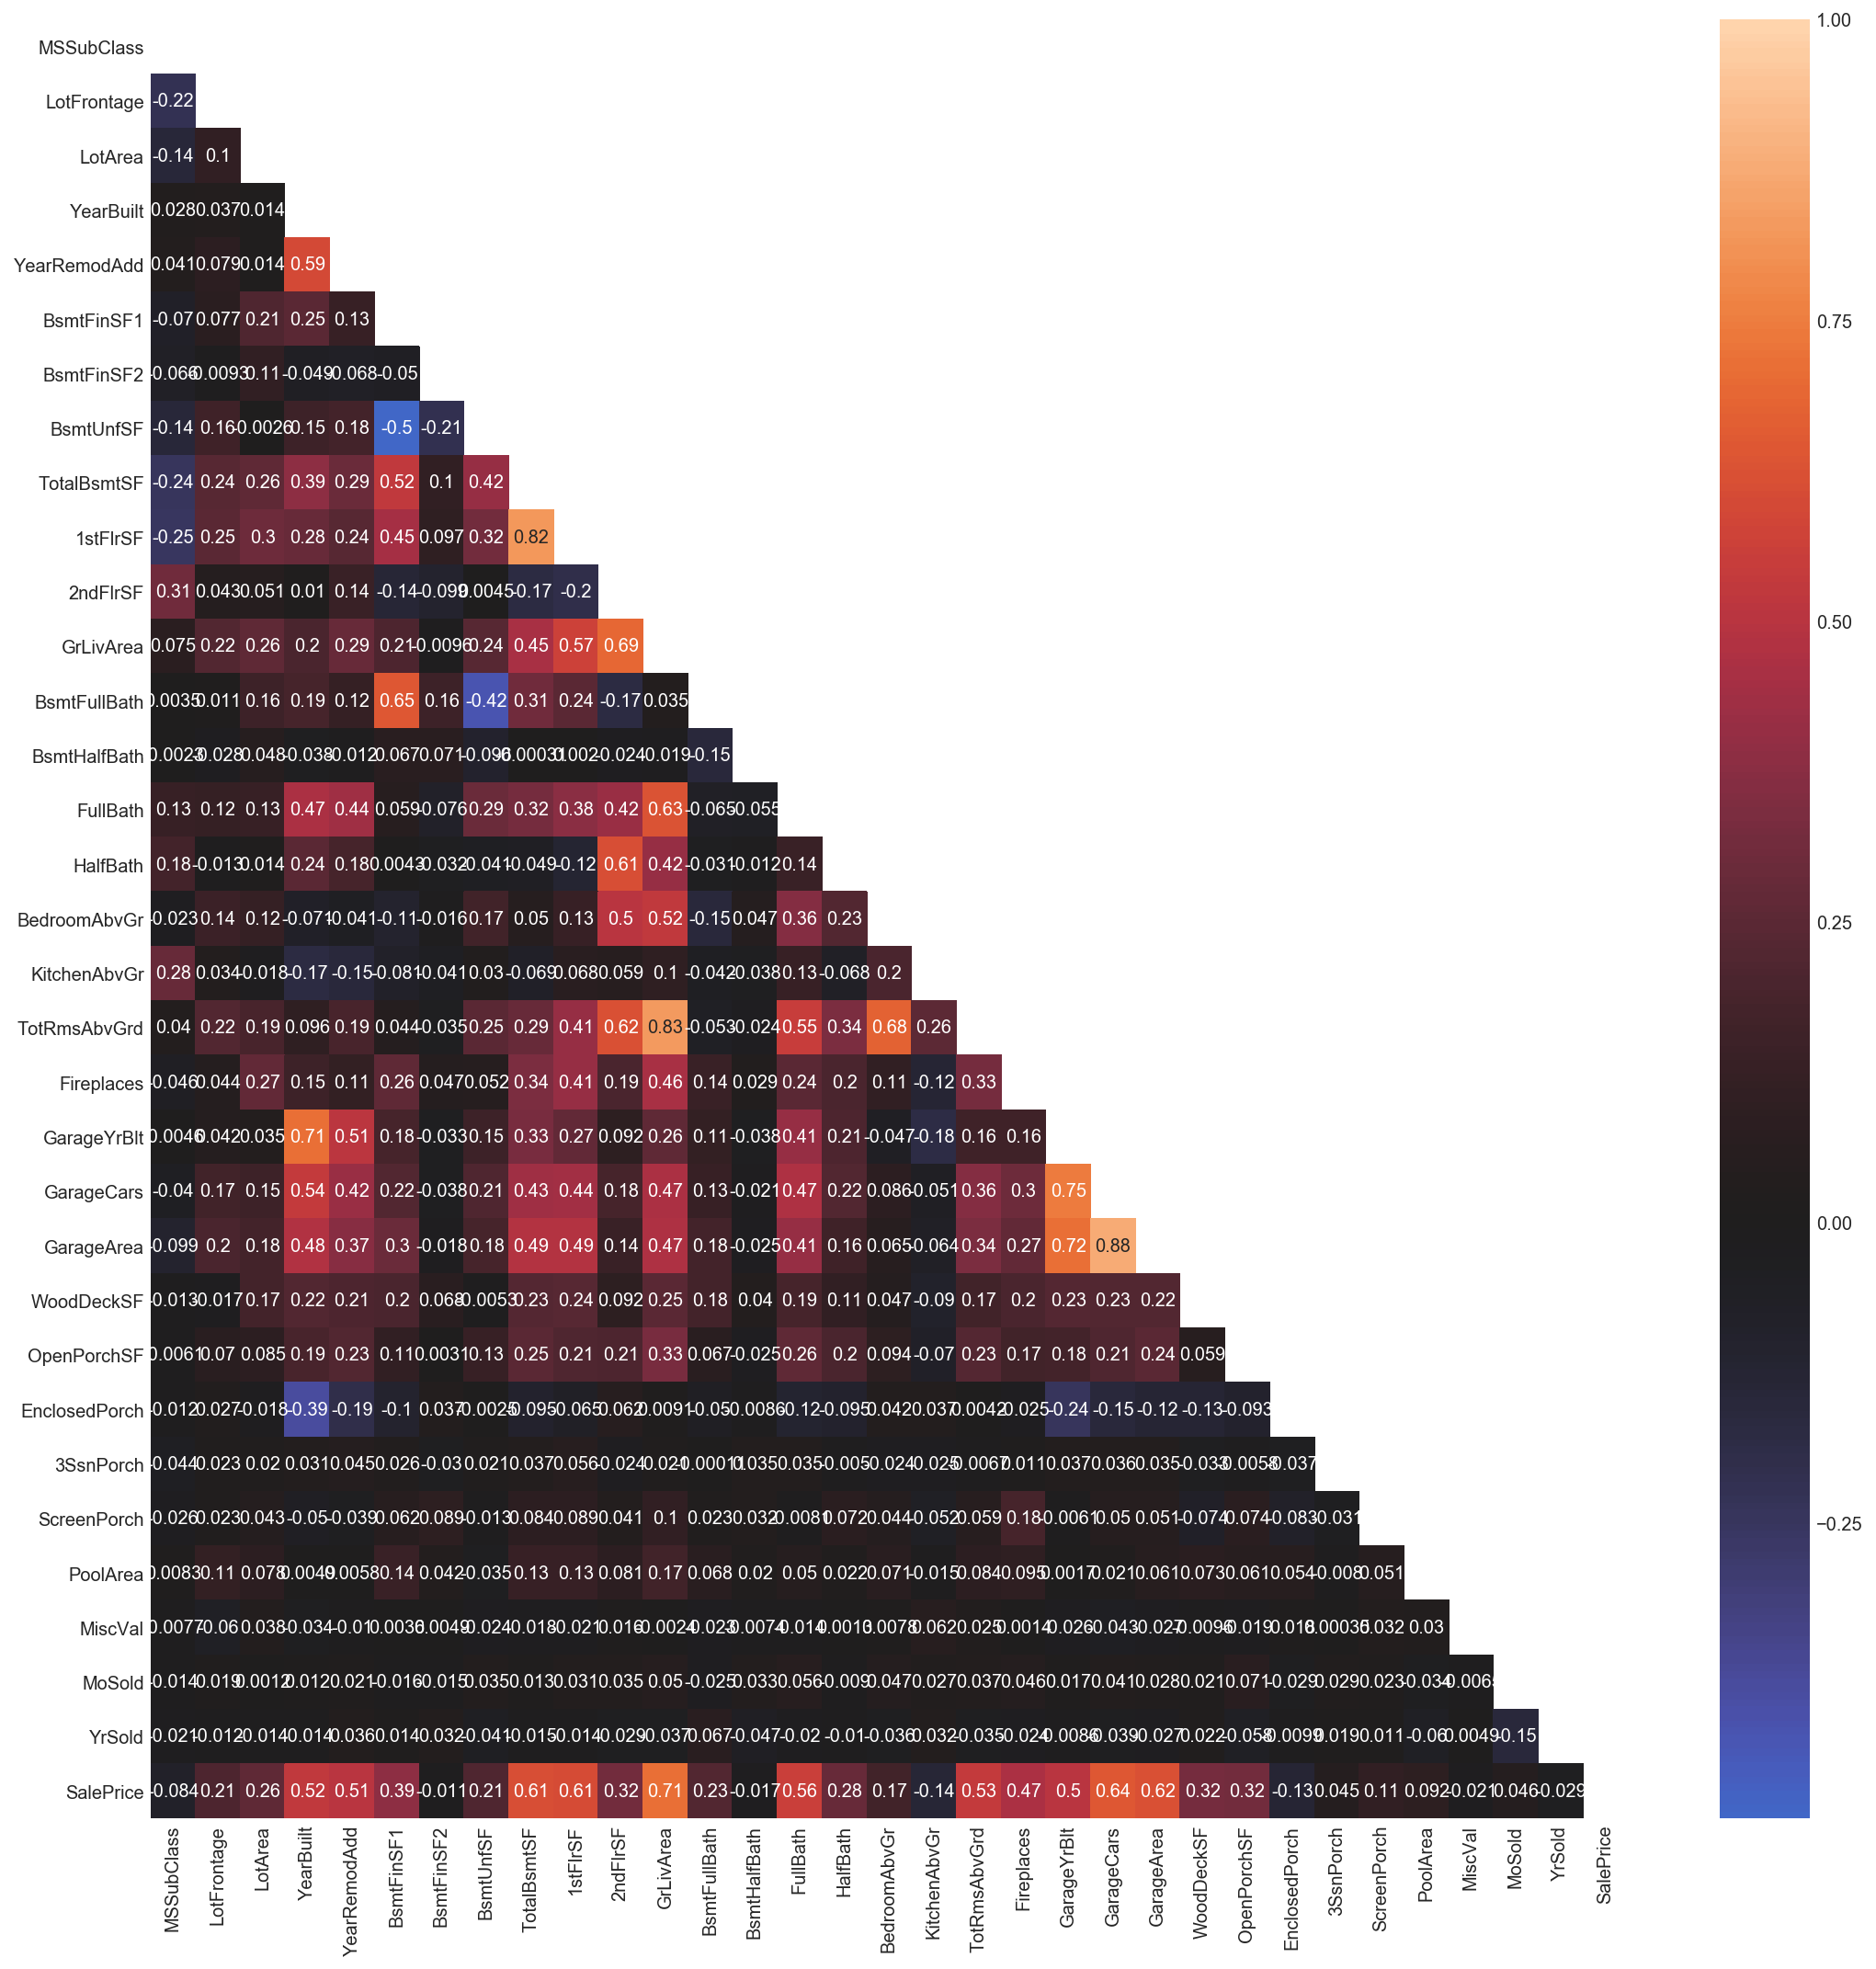

In [133]:
housefv1corr = housefv1.corr()
mask = np.zeros_like(housefv1corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18, 18))
fig1 = sns.heatmap(housefv1corr, annot=True, center=0, mask=mask)

In [134]:
print("Most important numerical features for sales price")
corr = housefv1.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Most important numerical features for sales price
SalePrice        1.000000
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.498569
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
YrSold          -0.028923
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


### Selecting some variables to use in the predictor matrix based on the heatmap and table above
### All variables with correlation values of more than |0.3| are included

In [135]:
housefmodel1pred = housef[['TotalBsmtSF',
 '1stFlrSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt']]
houseftarget = housef['SalePrice'].values

### Doing initial modelling

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as sm

In [137]:
# training data from before 2010
housefmodel1predtr = housef[housef['YrSold']!=2010][['TotalBsmtSF',
 '1stFlrSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt']]
houseftargettr = housef[housef['YrSold']!=2010][['SalePrice']].values

In [138]:
#housefmodel1predtr.isnull().sum()

In [139]:
# testing data from 2010
housefmodel1predtt = housef[housef['YrSold']==2010][['TotalBsmtSF',
 '1stFlrSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt']]
houseftargettt = housef[housef['YrSold']==2010][['SalePrice']]

In [140]:
# scale the data
ss = StandardScaler()
Xstr = ss.fit_transform(housefmodel1predtr)
Xstt = ss.fit_transform(housefmodel1predtt)

In [141]:
# initial R2 score of the model
lr = LinearRegression()
lr.fit(Xstr, houseftargettr)
lr.score(Xstt, houseftargettt)

0.7818907393498389

In [143]:
# ignore this
#yhat = lr.predict(housefmodel1predtt)
#sns.jointplot(houseftargettt, yhat)

In [144]:
# cross validating the model
scores = cross_val_score(lr, Xstr, houseftargettr, cv=10)
print "Cross-validated scores:", scores
print "Mean CV R2:", np.mean(scores)
print 'Std CV R2:', np.std(scores)
    

predictions = cross_val_predict(lr, Xstt, houseftargettt, cv=10)
    
r2 = metrics.r2_score(houseftargettt, predictions)
print "Cross-Predicted R2:", r2

Cross-validated scores: [0.80108461 0.76778504 0.80838112 0.70355679 0.7584973  0.76840685
 0.78299182 0.73304202 0.3843727  0.79355756]
Mean CV R2: 0.7301675818523428
Std CV R2: 0.1191325538522169
Cross-Predicted R2: 0.7584269156466226


### Cross-val R2 value is ~73% which seems ok
### Furthermore cross-predicted R2 is higher, which is supposed to indicate that overfitting didnt happen

### Using the feature selection library to see if the right numerical variables were chosen

In [145]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [146]:
# create temp df of all numerical attributes
housefvtemp1tr = housefv1[housefv1['YrSold']!=2010].drop(['SalePrice'],axis=1)
housefvtemp1tt = housefv1[housefv1['YrSold']==2010].drop(['SalePrice'],axis=1)

In [147]:
housefvtemp1tr.describe(include='all')

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1285.00000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000
mean,56.88716,57.501946,10557.164202,99.305058,112.850584,442.515953,44.146304,571.667704,1058.329961,1162.670039,351.322957,1520.329961,0.414008,0.063035,1.569650,0.384436,2.865370,1.045136,6.520623,0.617899,100.695720,1.777432,475.801556,93.037354,48.014008,21.532296,3.576654,15.273152,3.134630,38.863813,6.593774,2007.518288
std,41.93758,34.709983,10378.045954,30.413306,20.653560,459.379404,155.364225,446.451727,442.233182,387.449896,437.559437,528.872138,0.517413,0.249445,0.551842,0.503948,0.817311,0.218644,1.623116,0.639673,34.258978,0.752123,217.112236,123.546774,68.096309,61.151056,30.278738,56.520977,42.814056,509.908016,2.716333,1.124916
min,20.00000,0.000000,1300.000000,0.000000,78.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.00000,42.000000,7500.000000,81.000000,95.000000,0.000000,0.000000,224.000000,796.000000,882.000000,0.000000,1138.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,86.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.00000,63.000000,9490.000000,101.000000,122.000000,381.000000,0.000000,482.000000,990.000000,1091.000000,0.000000,1468.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,106.000000,2.000000,478.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2007.000000
75%,70.00000,79.000000,11645.000000,129.000000,132.000000,714.000000,0.000000,815.000000,1300.000000,1392.000000,729.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,129.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.00000,313.000000,215245.000000,137.000000,137.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,137.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2009.000000


In [148]:
tempcols = list(housefvtemp1tr.columns)

In [149]:
# building the selectors and fitting the models - no scaling was done for this portion
skb_f = SelectKBest(f_classif, k=10)
skb_chi2 = SelectKBest(chi2, k=10)
skb_f.fit(housefvtemp1tr, houseftargettr)
skb_chi2.fit(housefvtemp1tr, houseftargettr)

SelectKBest(k=10, score_func=<function chi2 at 0x000000000F4C7588>)

In [150]:
# checking the predicted best 10 numerical categories for chi2
kbestchi = pd.DataFrame([tempcols, list(skb_chi2.scores_)], 
                     index=['feature','chi2 score']).T.sort_values('chi2 score', ascending=False)
kbestchi

,feature,chi2 score
2,LotArea,9.74768e+06
29,MiscVal,6.6681e+06
10,2ndFlrSF,416971
5,BsmtFinSF1,361760
28,PoolArea,343623
6,BsmtFinSF2,317501
7,BsmtUnfSF,254470
26,3SsnPorch,183228
11,GrLivArea,176931
8,TotalBsmtSF,157492


In [151]:
# checking the predicted best 10 numerical categories for fclassif
kbestfclass=pd.DataFrame([tempcols, list(skb_f.scores_)], 
                     index=['feature','f class score']).T.sort_values('f class score', ascending=False)
kbestfclass

,feature,f class score
29,MiscVal,3.83315
11,GrLivArea,3.29698
2,LotArea,3.21346
14,FullBath,2.66101
21,GarageCars,2.64832
22,GarageArea,2.3951
9,1stFlrSF,2.21042
8,TotalBsmtSF,2.1812
3,YearBuilt,2.15207
20,GarageYrBlt,1.89386


### Using both these methods, the best 10 features aside from 'LotArea' have been incorporated into both the models, this feature is to be considered for later rounds
### 'MiscVal' also keeps appearing, investigating this further...

In [152]:
housef['MiscVal'].value_counts()
# given that this is null for most, we can ignore this variable's predictive property as it is only 
# relevant for some properties with special features of value

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

### Try lasso method to see which variables might need to be removed

In [153]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV

In [154]:
# find optimal lasso
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(housefvtemp1tr, houseftargettr)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

211010.8552427181


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   12.8s finished


In [155]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, housefvtemp1tt, houseftargettt, cv=10)

print lasso_scores
print np.mean(lasso_scores)

[0.5151219  0.55482429 0.9077235  0.71517387 0.82407061 0.84663432
 0.65246628 0.9038776  0.79299469 0.76450256]
0.7477389623678558


In [156]:
# trying to pring the coefficients of the lasso regularisation
lasso.fit(housefvtemp1tr, houseftargettr)
lasso_coefs = pd.DataFrame({'variable':housefvtemp1tr.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,abs_coef,coef,variable
3,361.364466,361.364466,YearBuilt
22,72.297875,72.297875,GarageArea
4,70.306587,70.306587,YearRemodAdd
11,67.662131,67.662131,GrLivArea
23,35.024233,35.024233,WoodDeckSF
8,31.765765,31.765765,TotalBsmtSF
5,11.543477,11.543477,BsmtFinSF1
10,2.093311,2.093311,2ndFlrSF
29,0.874782,-0.874782,MiscVal
7,0.631306,0.631306,BsmtUnfSF


### Compared to the initial model used, the following features can be considered for selection based on the lasso results:
### LotArea
### BsmtUnfSF
### BsmtFinSF2
### Lasso also suggests that features such as 'Garage Cars' can be dropped. This is to be considered for the later version

### Next step involves fine tuning the model by including categorical variables that may be appropriate

In [157]:
# features with categorical values
housefv2.columns

Index([u'MSZoning', u'Street', u'Alley', u'LotShape', u'LandContour',
       u'Utilities', u'LotConfig', u'LandSlope', u'Neighborhood',
       u'Condition1', u'Condition2', u'BldgType', u'HouseStyle', u'Foundation',
       u'BsmtExposure', u'GarageType', u'PavedDrive', u'SaleType',
       u'SaleCondition', u'SalePrice'],
      dtype='object')

In [158]:
# initial hypothesis is that these following categories will be relevant for predicting price
 'MSZoning',
 'Street',
 'Alley',
 'Utilities',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'GarageType',
 'PavedDrive',
'BldgType',

IndentationError: unexpected indent (<ipython-input-158-6baab3833ad8>, line 2)

### Doing some investigation on which of these have enough unique values to warrant further investigation

In [159]:
housef['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [160]:
housef['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [161]:
housef['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [162]:
housef['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

### Choosing the following features for further analysis and ignoring others which either have too few/higly skewed unique values, or far too many categorical attributes

In [163]:
# MSZoning, Alley, LotConfig, Neighborhood, GarageType, PavedDrive - ignore
# ['Alley','GarageType','LotConfig','MSZoning','Neighborhood','PavedDrive','BldgType','LotShape','HouseStyle','Foundation']

In [164]:
temp_dummy = pd.get_dummies(housefv2, prefix=['PavedDrive', 'MSZoning','Alley','LotConfig','Neighborhood','GarageType',\
                                             'BldgType','LotShape','HouseStyle','Foundation'],\
                            columns=['PavedDrive', 'MSZoning','Alley','LotConfig','Neighborhood','GarageType',\
                            'BldgType','LotShape','HouseStyle','Foundation']\
                                     ,drop_first=True)
temp_dummy.head()

,Street,LandContour,Utilities,LandSlope,Condition1,Condition2,BsmtExposure,SaleType,SaleCondition,SalePrice,PavedDrive_P,PavedDrive_Y,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Pave,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LotShape_IR2,LotShape_IR3,LotShape_Reg,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,Pave,Lvl,AllPub,Gtl,Norm,Norm,No,WD,Normal,208500,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,Pave,Lvl,AllPub,Gtl,Feedr,Norm,Gd,WD,Normal,181500,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,Pave,Lvl,AllPub,Gtl,Norm,Norm,Mn,WD,Normal,223500,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,Pave,Lvl,AllPub,Gtl,Norm,Norm,No,WD,Abnorml,140000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Pave,Lvl,AllPub,Gtl,Norm,Norm,Av,WD,Normal,250000,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [165]:
temp_dummy.drop(temp_dummy.iloc[:,0:10],axis=1,inplace=True)
temp_dummy.head()

,PavedDrive_P,PavedDrive_Y,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Pave,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LotShape_IR2,LotShape_IR3,LotShape_Reg,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [166]:
housefv2 = pd.concat([housef[['YrSold']],temp_dummy],axis=1)
housefv2 = pd.concat([housef[['SalePrice']],housefv2],axis=1)

In [167]:
# this is the separate dataframe of categorical variables
housefv2.head()

,SalePrice,YrSold,PavedDrive_P,PavedDrive_Y,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Pave,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LotShape_IR2,LotShape_IR3,LotShape_Reg,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,208500,2008,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,181500,2007,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,223500,2008,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,140000,2006,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,250000,2008,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [168]:
#tempcold = ['Alley','BldgType','BsmtExposure','BsmtQual','Condition1','Condition2','Foundation',
                         #'GarageType','HouseStyle','LandContour','LandSlope','LotConfig','LotShape','MSZoning','Neighborhood',
                         #'PavedDrive','SaleCondition','SaleType','Street','Utilities']
#housefv3 = housefv2.drop(tempcold,axis=1)
#housefv3.head()

### Modelling using just the selected categorical attributes

In [173]:
# training data from before 2010
housefmodel2predtr = housefv2[housefv2['YrSold']!=2010].drop(['SalePrice'],axis=1)
houseftarget2tr = housef[housef['YrSold']!=2010][['SalePrice']].values

In [174]:
# testing data from 2010
housefmodel2predtt = housefv2[housefv2['YrSold']==2010].drop(['SalePrice'],axis=1)
houseftarget2tt = housef[housef['YrSold']==2010][['SalePrice']].values

In [175]:
# scaling the data
ss = StandardScaler()
Xstr2 = ss.fit_transform(housefmodel2predtr)
Xstt2 = ss.fit_transform(housefmodel2predtt)

In [176]:
# initial R2 score of the model
lr = LinearRegression()
lr.fit(Xstr2, houseftarget2tr)
lr.score(Xstt2, houseftarget2tt)

0.600013367966732

### R2 seems high enough, but this is not entirely reflective as we are using only some categorical variables
### No separate feature analysis/regularisation is done for now until variables are combined in the next step
### Ideally, we should be getting dummies for all the categorical features and then using some form of feature selection to eliminate the ones with little predictive value - to be considered if there is time

### Combining the numerical and categorical variables and running regression again

In [177]:
# creating new df of numericalal features selected based on last lasso done
housefmodel2pred = housef[['TotalBsmtSF',
 '1stFlrSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'LotArea',
 'BsmtUnfSF',
 'BsmtFinSF2']]

In [178]:
housefcomb = pd.concat([housefv2,housefmodel2pred], axis=1)
housefcomb.head()

,SalePrice,YrSold,PavedDrive_P,PavedDrive_Y,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Pave,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LotShape_IR2,LotShape_IR3,LotShape_Reg,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,TotalBsmtSF,1stFlrSF,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YearBuilt,YearRemodAdd,GarageYrBlt,LotArea,BsmtUnfSF,BsmtFinSF2
0,208500,2008,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,856,856,856,854,1710,2,1,8,0,2,548,0,61,131,131,131.0,8450,150,0
1,181500,2007,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1262,1262,1262,0,1262,2,0,6,1,2,460,298,0,104,104,104.0,9600,284,0
2,223500,2008,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,920,920,920,866,1786,2,1,6,1,2,608,0,42,129,130,129.0,11250,434,0
3,140000,2006,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,756,961,756,756,1717,1,0,7,1,3,642,0,35,43,98,126.0,9550,540,0
4,250000,2008,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1145,1145,1145,1053,2198,2,1,9,1,3,836,192,84,128,128,128.0,14260,490,0


In [179]:
# preparing data for regression using combined predictors
# training data from before 2010
housefmodelcombpredtr = housefcomb[housefcomb['YrSold']!=2010].drop(['YrSold', 'SalePrice'], axis=1)
houseftargetcombtr = housefcomb[housefcomb['YrSold']!=2010][['SalePrice']].values

In [180]:
# testing data from 2010
housefmodelcombpredtt = housefcomb[housefcomb['YrSold']==2010].drop(['YrSold', 'SalePrice'], axis=1)
houseftargetcombtt = housefcomb[housefcomb['YrSold']==2010][['SalePrice']].values

In [181]:
# scaling the data
ss = StandardScaler()
Xstrcomb = ss.fit_transform(housefmodelcombpredtr)
Xsttcomb = ss.fit_transform(housefmodelcombpredtt)

In [182]:
# initial R2 score of the model
lr = LinearRegression()
lr.fit(Xstrcomb, houseftargetcombtr)
lr.score(Xsttcomb, houseftargetcombtt)

0.8470586247344636

In [183]:
# cross validating the model
scores = cross_val_score(lr, Xstrcomb, houseftargetcombtr, cv=10)
print "Cross-validated scores:", scores
print "Mean CV R2:", np.mean(scores)
print 'Std CV R2:', np.std(scores)
fixedaccuracy = np.mean(scores)    

predictions = cross_val_predict(lr, Xsttcomb, houseftargetcombtt, cv=10)
    
r2 = metrics.r2_score(houseftargetcombtt, predictions)
print "Cross-Predicted R2:", r2

Cross-validated scores: [0.8771269  0.81684405 0.84165351 0.73822861 0.82500718 0.81252334
 0.85703784 0.76619482 0.51004544 0.83215186]
Mean CV R2: 0.7876813551673687
Std CV R2: 0.10027522060562005
Cross-Predicted R2: -1.3171715836920326e+25


### New CV R2 is 78%, which is good
### Crsss predicted R2 is much lower this time than CV R2, which is supposed to indicate that overfitting might be a possibility, but ignoring this for now since this was scored on testing set

### Running lasso again to validate overall feature selection

In [184]:
# repeat lasso one more time on combined model
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(housefmodelcombpredtr, houseftargettr)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

211010.8552427181


In [185]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, housefmodelcombpredtt, houseftargettt, cv=10)

print lasso_scores
print np.mean(lasso_scores)

[0.51273868 0.56786745 0.90698846 0.70945708 0.81695906 0.84861432
 0.64486581 0.90736467 0.79412891 0.74953427]
0.7458518712542352


In [186]:
# trying to pring the coefficients of the lasso regularisation
lasso.fit(housefmodelcombpredtr, houseftargettr)
lasso_coefs = pd.DataFrame({'variable':housefmodelcombpredtr.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,abs_coef,coef,variable
72,365.267026,365.267026,YearBuilt
69,72.532484,72.532484,GarageArea
63,67.670739,67.670739,GrLivArea
73,63.794529,63.794529,YearRemodAdd
61,36.232929,36.232929,TotalBsmtSF
70,36.129517,36.129517,WoodDeckSF
77,9.892861,-9.892861,BsmtFinSF2
76,8.018888,-8.018888,BsmtUnfSF
59,5.541698,5.541698,TotalBsmtSF
62,1.868448,1.868448,2ndFlrSF


### Ideally model should be simplified using coefficients above, but I ain't go no time for that

### Plotting results of final model

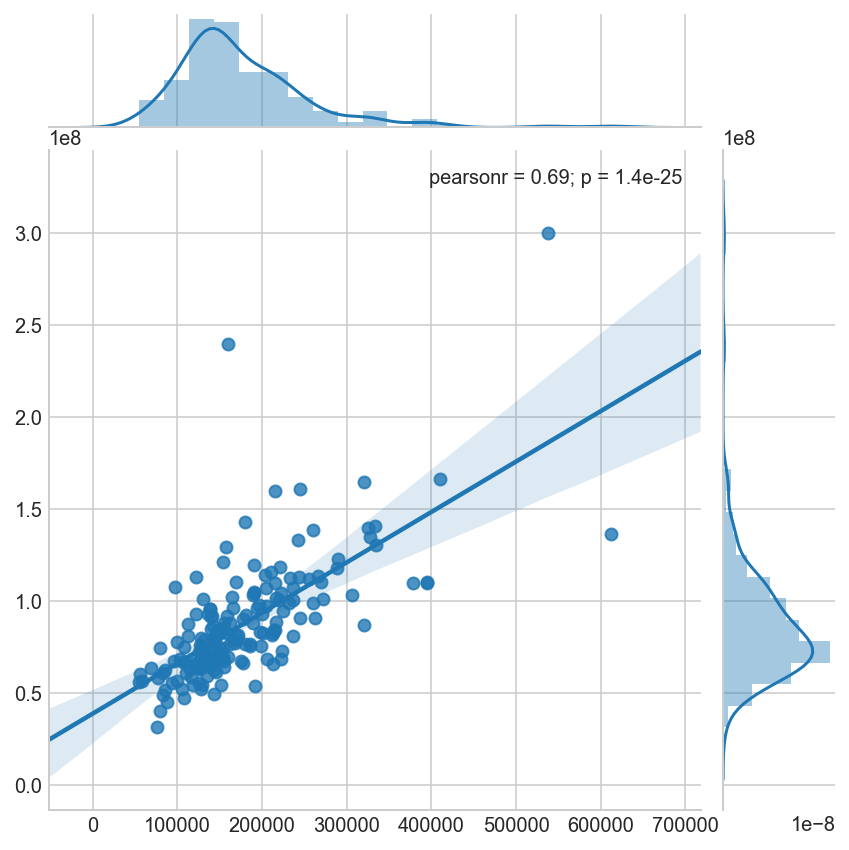

In [187]:
# overall result of model
yhat = lr.predict(housefmodelcombpredtt)
#yhat = lr.predict(Xsttcomb)
sns.jointplot(houseftargetcombtt, yhat, kind="reg")

### Time to finally do some independent scoring using stats model

In [188]:
# scoring is done on training data
#model = sm.OLS(houseftargetcombtr, Xstrcomb).fit()
model = sm.OLS(houseftargetcombtr,housefmodelcombpredtr).fit()
# predictions = model.predict(Xstrcomb)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     549.9
Date:                Thu, 05 Apr 2018   Prob (F-statistic):               0.00
Time:                        22:04:52   Log-Likelihood:                -15192.
No. Observations:                1285   AIC:                         3.054e+04
Df Residuals:                    1208   BIC:                         3.093e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
PavedDrive_P          -321.1486   7825.375     -0.041      0.967   -1.57e+04     1.5e+04
PavedDrive_Y           147.3828   4708.697      0.031      0.975   -9090.750    9385.515
MSZoning_FV           3883.1247   1.47e+04      0.264      0.792   -2.49e+04    3.27e+04
MSZoning_RH           1852.5851   1.45e+04      0.128      0.898   -2.66e+04    3.03e+04
MSZoning_RL           1926.2665   1.15e+04      0.168      0.867   -2.06e+04    2.44e+04
MSZoning_RM           1.169e+04   1.19e+04      0.986      0.325   -1.16e+04     3.5e+04
Alley_Pave           -3038.2461   6909.868     -0.440      0.660   -1.66e+04    1.05e+04
LotConfig_CulDSac     1.072e+04   4740.285      2.261      0.024    1415.783       2e+04
LotConfig_FR2         -1.37e+04   6082.284     -2.253      0.024   -2.56e+04   -1771.863
LotConfig_FR3        -2.436e+04   1.77e+04     -1.379      0.168    -5.9e+04    1.03e+04
LotConfig_Inside       819.5590   2633.428      0.311      0.756   -4347.041    5986.159
Neighborhood_Blueste -2.605e+04   2.62e+04     -0.996      0.320   -7.74e+04    2.53e+04
Neighborhood_BrDale  -9530.1378   1.41e+04     -0.677      0.499   -3.72e+04    1.81e+04
Neighborhood_BrkSide -3.501e+04   1.03e+04     -3.401      0.001   -5.52e+04   -1.48e+04
Neighborhood_ClearCr -4.607e+04   1.16e+04     -3.972      0.000   -6.88e+04   -2.33e+04
Neighborhood_CollgCr -2.831e+04   9170.299     -3.087      0.002   -4.63e+04   -1.03e+04
Neighborhood_Crawfor -7697.2918   1.02e+04     -0.758      0.448   -2.76e+04    1.22e+04
Neighborhood_Edwards -4.895e+04   9309.244     -5.258      0.000   -6.72e+04   -3.07e+04
Neighborhood_Gilbert -3.787e+04   9854.051     -3.843      0.000   -5.72e+04   -1.85e+04
Neighborhood_IDOTRR   -4.88e+04   1.08e+04     -4.506      0.000      -7e+04   -2.76e+04
Neighborhood_MeadowV -3.708e+04   1.36e+04     -2.732      0.006   -6.37e+04   -1.04e+04
Neighborhood_Mitchel -4.694e+04      1e+04     -4.688      0.000   -6.66e+04   -2.73e+04
Neighborhood_NAmes   -3.752e+04   9252.362     -4.055      0.000   -5.57e+04   -1.94e+04
Neighborhood_NPkVill -6516.8108   1.58e+04     -0.413      0.680   -3.75e+04    2.44e+04
Neighborhood_NWAmes  -4.217e+04   9887.008     -4.265      0.000   -6.16e+04   -2.28e+04
Neighborhood_NoRidge   2.88e+04    1.1e+04      2.627      0.009    7293.786    5.03e+04
Neighborhood_NridgHt  4.744e+04   9542.278      4.971      0.000    2.87e+04    6.62e+04
Neighborhood_OldTown -5.281e+04   1.05e+04     -5.020      0.000   -7.34e+04   -3.22e+04
Neighborhood_SWISU   -4.608e+04   1.21e+04     -3.797      0.000   -6.99e+04   -2.23e+04
Neighborhood_Sawyer  -4.692e+04   9963.925     -4.709      0.000   -6.65e+04   -2.74e+04
Neighborhood_SawyerW -3.384e+04   1.01e+04     -3.364      0.001   -5.36e+04   -1.41e+04
Neighborhood_Somerst  1275.6960   1.17e+04      0.109    

### Overall performance of model is R2 of 78% with SD of 10% according to scikit LR model and R2 is higher based on statsmodel
### Top three best predictors of price are 1) Age of House (based on year built), 2) Garage Area and 3) Gross Living Area
### Ideally, now would be a good time for some gridsearch optimisation. However, moving on as far too much time has been spent on this question over multiple iterations

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

### Initial analysis

In [189]:
houser.shape

(1460, 30)

In [190]:
# A:
houser.head()

,SalePrice,YrSold,Id,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence
0,208500,2008,1,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,Gd,TA,GLQ,Unf,GasA,Ex,Y,SBrkr,0,Gd,Typ,NaN,RFn,TA,TA,NaN,NaN
1,181500,2007,2,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Gd,TA,ALQ,Unf,GasA,Ex,Y,SBrkr,0,TA,Typ,TA,RFn,TA,TA,NaN,NaN
2,223500,2008,3,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,Gd,TA,GLQ,Unf,GasA,Ex,Y,SBrkr,0,Gd,Typ,TA,RFn,TA,TA,NaN,NaN
3,140000,2006,4,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,TA,Gd,ALQ,Unf,GasA,Gd,Y,SBrkr,0,Gd,Typ,Gd,Unf,TA,TA,NaN,NaN
4,250000,2008,5,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,Gd,TA,GLQ,Unf,GasA,Ex,Y,SBrkr,0,Gd,Typ,TA,RFn,TA,TA,NaN,NaN


In [191]:
# creating new column to reflect variance not explained from earlier model
houser['Saleunexplainedeffect'] = houser['SalePrice']*(1-fixedaccuracy)
houser.head()

,SalePrice,YrSold,Id,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,Saleunexplainedeffect
0,208500,2008,1,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,Gd,TA,GLQ,Unf,GasA,Ex,Y,SBrkr,0,Gd,Typ,NaN,RFn,TA,TA,NaN,NaN,44268.437448
1,181500,2007,2,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Gd,TA,ALQ,Unf,GasA,Ex,Y,SBrkr,0,TA,Typ,TA,RFn,TA,TA,NaN,NaN,38535.834037
2,223500,2008,3,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,Gd,TA,GLQ,Unf,GasA,Ex,Y,SBrkr,0,Gd,Typ,TA,RFn,TA,TA,NaN,NaN,47453.217120
3,140000,2006,4,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,TA,Gd,ALQ,Unf,GasA,Gd,Y,SBrkr,0,Gd,Typ,Gd,Unf,TA,TA,NaN,NaN,29724.610277
4,250000,2008,5,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,Gd,TA,GLQ,Unf,GasA,Ex,Y,SBrkr,0,Gd,Typ,TA,RFn,TA,TA,NaN,NaN,53079.661208


In [193]:
houser.dtypes

SalePrice                  int64
YrSold                     int64
Id                         int64
OverallQual                int64
OverallCond                int64
RoofStyle                 object
RoofMatl                  object
Exterior1st               object
Exterior2nd               object
MasVnrType                object
MasVnrArea               float64
ExterQual                 object
ExterCond                 object
BsmtQual                  object
BsmtCond                  object
BsmtFinType1              object
BsmtFinType2              object
Heating                   object
HeatingQC                 object
CentralAir                object
Electrical                object
LowQualFinSF               int64
KitchenQual               object
Functional                object
FireplaceQu               object
GarageFinish              object
GarageQual                object
GarageCond                object
PoolQC                    object
Fence                     object
Saleunexpl

### Hypothesising and investigating which features might actually be worth retaining

In [194]:
houser.columns

Index([u'SalePrice', u'YrSold', u'Id', u'OverallQual', u'OverallCond',
       u'RoofStyle', u'RoofMatl', u'Exterior1st', u'Exterior2nd',
       u'MasVnrType', u'MasVnrArea', u'ExterQual', u'ExterCond', u'BsmtQual',
       u'BsmtCond', u'BsmtFinType1', u'BsmtFinType2', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'LowQualFinSF', u'KitchenQual',
       u'Functional', u'FireplaceQu', u'GarageFinish', u'GarageQual',
       u'GarageCond', u'PoolQC', u'Fence', u'Saleunexplainedeffect'],
      dtype='object')

In [196]:
# checking values within columns
houser['Heating'].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [197]:
houser['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [198]:
houser['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Metal         1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64

### Dropping the following features as they are too imbalanced

In [199]:
# RoofMatl, Heating, LowQualFinSF, Functional

In [200]:
houser.drop(['RoofMatl','Heating','LowQualFinSF','Functional'], axis=1, inplace=True)
houser.shape

(1460, 27)

### Feature engineering remaining variables to make them numerical and/or dummy and clearning up in general

In [221]:
# ignore this
#houser = houser.replace({"BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
 #                      "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
  #                                       "ALQ" : 5, "GLQ" : 6},
   #                  
    #                   "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
     #                                    "ALQ" : 5, "GLQ" : 6},
      #                 "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
       #                "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
        #               "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
         #              "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
          #             "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
           #                            "Min2" : 6, "Min1" : 7, "Typ" : 8},
            #           "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
             #          "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
              #         "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
               #        "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                #       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4}})

In [202]:
houser = houser.replace({"BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4}})

In [203]:
houser.head()

,SalePrice,YrSold,Id,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,Saleunexplainedeffect
0,208500,2008,1,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,4,3,4.0,3.0,GLQ,Unf,5,Y,SBrkr,4,NaN,RFn,3.0,3.0,NaN,NaN,44268.437448
1,181500,2007,2,6,8,Gable,MetalSd,MetalSd,None,0.0,3,3,4.0,3.0,ALQ,Unf,5,Y,SBrkr,3,3.0,RFn,3.0,3.0,NaN,NaN,38535.834037
2,223500,2008,3,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,4,3,4.0,3.0,GLQ,Unf,5,Y,SBrkr,4,3.0,RFn,3.0,3.0,NaN,NaN,47453.217120
3,140000,2006,4,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,3,3,3.0,4.0,ALQ,Unf,4,Y,SBrkr,4,4.0,Unf,3.0,3.0,NaN,NaN,29724.610277
4,250000,2008,5,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,4,3,4.0,3.0,GLQ,Unf,5,Y,SBrkr,4,3.0,RFn,3.0,3.0,NaN,NaN,53079.661208


In [204]:
houser.isnull().sum()

SalePrice                   0
YrSold                      0
Id                          0
OverallQual                 0
OverallCond                 0
RoofStyle                   0
Exterior1st                 0
Exterior2nd                 0
MasVnrType                  8
MasVnrArea                  8
ExterQual                   0
ExterCond                   0
BsmtQual                   37
BsmtCond                   37
BsmtFinType1               37
BsmtFinType2               38
HeatingQC                   0
CentralAir                  0
Electrical                  1
KitchenQual                 0
FireplaceQu               690
GarageFinish               81
GarageQual                 81
GarageCond                 81
PoolQC                   1453
Fence                    1179
Saleunexplainedeffect       0
dtype: int64

In [205]:
# dropping these two columns as they have too many null values
houser.drop(['PoolQC','Fence'],axis=1, inplace=True)

In [206]:
# filling nil values with zero for numerical columns
houser[['GarageFinish', 'GarageQual','GarageCond','FireplaceQu','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']]=\
houser[['GarageFinish', 'GarageQual','GarageCond','FireplaceQu','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']]\
.fillna(value=0)

In [207]:
houser[['MasVnrType']] = houser[['MasVnrType']].fillna(value='None')
houser[['MasVnrArea']] = houser[['MasVnrArea']].replace('None',0)

In [208]:
houser[['MasVnrArea']] = houser[['MasVnrArea']].fillna(value=0)

In [209]:
houser.isnull().sum()

SalePrice                0
YrSold                   0
Id                       0
OverallQual              0
OverallCond              0
RoofStyle                0
Exterior1st              0
Exterior2nd              0
MasVnrType               0
MasVnrArea               0
ExterQual                0
ExterCond                0
BsmtQual                 0
BsmtCond                 0
BsmtFinType1             0
BsmtFinType2             0
HeatingQC                0
CentralAir               0
Electrical               1
KitchenQual              0
FireplaceQu              0
GarageFinish             0
GarageQual               0
GarageCond               0
Saleunexplainedeffect    0
dtype: int64

In [210]:
houser.shape

(1460, 25)

In [211]:
# getting rid of the one entry with null values under electrical category
houser = houser.dropna(axis=0, how='any')
houser.shape

(1459, 25)

In [212]:
houser.dtypes

SalePrice                  int64
YrSold                     int64
Id                         int64
OverallQual                int64
OverallCond                int64
RoofStyle                 object
Exterior1st               object
Exterior2nd               object
MasVnrType                object
MasVnrArea               float64
ExterQual                  int64
ExterCond                  int64
BsmtQual                 float64
BsmtCond                 float64
BsmtFinType1              object
BsmtFinType2              object
HeatingQC                  int64
CentralAir                object
Electrical                object
KitchenQual                int64
FireplaceQu              float64
GarageFinish              object
GarageQual               float64
GarageCond               float64
Saleunexplainedeffect    float64
dtype: object

In [213]:
# segregating columns with object values
tempfeat3 = [x for x in houser.columns if houser[x].dtype == object]
houser2 = houser[tempfeat3]
houser2.head()

,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,BsmtFinType1,BsmtFinType2,CentralAir,Electrical,GarageFinish
0,Gable,VinylSd,VinylSd,BrkFace,GLQ,Unf,Y,SBrkr,RFn
1,Gable,MetalSd,MetalSd,None,ALQ,Unf,Y,SBrkr,RFn
2,Gable,VinylSd,VinylSd,BrkFace,GLQ,Unf,Y,SBrkr,RFn
3,Gable,Wd Sdng,Wd Shng,None,ALQ,Unf,Y,SBrkr,Unf
4,Gable,VinylSd,VinylSd,BrkFace,GLQ,Unf,Y,SBrkr,RFn


In [214]:
# getting dummies for these columns and then adding them to create combined df
houser2.columns

Index([u'RoofStyle', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'BsmtFinType1', u'BsmtFinType2', u'CentralAir', u'Electrical',
       u'GarageFinish'],
      dtype='object')

In [215]:
temp_dummy2 = pd.get_dummies(houser2, prefix=['RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',\
       'BsmtFinType1', 'BsmtFinType2', 'CentralAir', 'Electrical', 'GarageFinish'],\
        columns=['RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',\
       'BsmtFinType1', 'BsmtFinType2', 'CentralAir', 'Electrical',\
       'GarageFinish'],drop_first=True)
temp_dummy2.head()

,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0


In [216]:
# combining to get final df
houser3 = pd.concat([houser,temp_dummy2],axis=1)
houser3.head()

,SalePrice,YrSold,Id,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,Saleunexplainedeffect,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,208500,2008,1,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,4,3,4.0,3.0,GLQ,Unf,5,Y,SBrkr,4,0.0,RFn,3.0,3.0,44268.437448,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0
1,181500,2007,2,6,8,Gable,MetalSd,MetalSd,None,0.0,3,3,4.0,3.0,ALQ,Unf,5,Y,SBrkr,3,3.0,RFn,3.0,3.0,38535.834037,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0
2,223500,2008,3,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,4,3,4.0,3.0,GLQ,Unf,5,Y,SBrkr,4,3.0,RFn,3.0,3.0,47453.217120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0
3,140000,2006,4,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,3,3,3.0,4.0,ALQ,Unf,4,Y,SBrkr,4,4.0,Unf,3.0,3.0,29724.610277,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1
4,250000,2008,5,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,4,3,4.0,3.0,GLQ,Unf,5,Y,SBrkr,4,3.0,RFn,3.0,3.0,53079.661208,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0


In [217]:
houser3.shape

(1459, 82)

In [218]:
# cleaning up
houser3.drop(['RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',\
       'BsmtFinType1', 'BsmtFinType2', 'CentralAir', 'Electrical', 'GarageFinish'], axis=1, inplace=True)

In [219]:
houser3.drop(['SalePrice','Id'],axis=1,inplace=True)

In [220]:
houser3.head()

,YrSold,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,Saleunexplainedeffect,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,2008,7,5,196.0,4,3,4.0,3.0,5,4,0.0,3.0,3.0,44268.437448,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0
1,2007,6,8,0.0,3,3,4.0,3.0,5,3,3.0,3.0,3.0,38535.834037,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0
2,2008,7,5,162.0,4,3,4.0,3.0,5,4,3.0,3.0,3.0,47453.217120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0
3,2006,7,5,0.0,3,3,3.0,4.0,4,4,4.0,3.0,3.0,29724.610277,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1
4,2008,8,5,350.0,4,3,4.0,3.0,5,4,3.0,3.0,3.0,53079.661208,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0


### Running the regression of these variables against the remainder in price

In [222]:
# training data from before 2010
houserpredtr = houser3[houser3['YrSold']!=2010].drop(['YrSold','Saleunexplainedeffect'],axis=1)
housertargettr = houser3[houser3['YrSold']!=2010][['Saleunexplainedeffect']]

In [223]:
# testing data from 2010
houserpredtt = houser3[houser3['YrSold']==2010].drop(['YrSold','Saleunexplainedeffect'],axis=1)
housertargettt = houser3[houser3['YrSold']==2010][['Saleunexplainedeffect']]

In [224]:
# scaling the data
ss = StandardScaler()
Xsrenotr = ss.fit_transform(houserpredtr)
Xsrenott = ss.fit_transform(houserpredtt)

In [225]:
# initial R2 score of the model
lr = LinearRegression()
lr.fit(Xsrenotr, housertargettr)
lr.score(Xsrenott, housertargettt)

0.750879210764357

In [226]:
# cross validating the model
scores = cross_val_score(lr, Xsrenotr, housertargettr, cv=10)
print "Cross-validated scores:", scores
print "Mean CV R2:", np.mean(scores)
print 'Std CV R2:', np.std(scores)
    

predictions = cross_val_predict(lr, Xsrenott, housertargettt, cv=10)
    
r2 = metrics.r2_score(housertargettt, predictions)
print "Cross-Predicted R2:", r2

Cross-validated scores: [ 7.36668797e-01  7.05868792e-01 -1.63237014e+22  6.96565165e-01
 -7.87850182e+26  7.00283034e-01  6.94495299e-01 -3.22663631e+26
 -6.31987465e+25 -1.02306930e+23]
Mean CV R2: -1.1738311897938432e+26
Std CV R2: 2.4311023300836432e+26
Cross-Predicted R2: -1.3799337895113049e+26


### Individual R2 of 75% is fine but cross-validated value is bad, investigating further using lasso

In [227]:
# use lasso to see which features to retain
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(houserpredtr, housertargettr)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

1452.0705952062767


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   13.7s finished


In [228]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, houserpredtt, housertargettt, cv=10)

print lasso_scores
print np.mean(lasso_scores)

[0.71246659 0.42388766 0.77111439 0.7272991  0.08144931 0.69401511
 0.70078538 0.74192096 0.57115081 0.7552702 ]
0.6179359495101812


In [229]:
# trying to pring the coefficients of the lasso regularisation
lasso.fit(houserpredtr, housertargettr)
lasso_coefs = pd.DataFrame({'variable':houserpredtr.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,abs_coef,coef,variable
0,6447.000704,6447.000704,OverallQual
9,1251.634843,1251.634843,FireplaceQu
8,1081.148869,1081.148869,KitchenQual
5,693.117468,693.117468,BsmtQual
2,17.489734,17.489734,MasVnrArea
45,0.000000,-0.000000,Exterior2nd_Wd Shng
51,0.000000,0.000000,BsmtFinType1_GLQ
50,0.000000,-0.000000,BsmtFinType1_BLQ
49,0.000000,0.000000,BsmtFinType1_ALQ
48,0.000000,0.000000,MasVnrType_Stone


### Based on the lasso results, the following features are best chosen to be renovated in order to increase the selling price of the house (assuming renovation costs are really minimal as described)
### 1) Fireplace Quality 2) Kitchen Quality 3) Basement Quality 4) Masonry Veneer Area

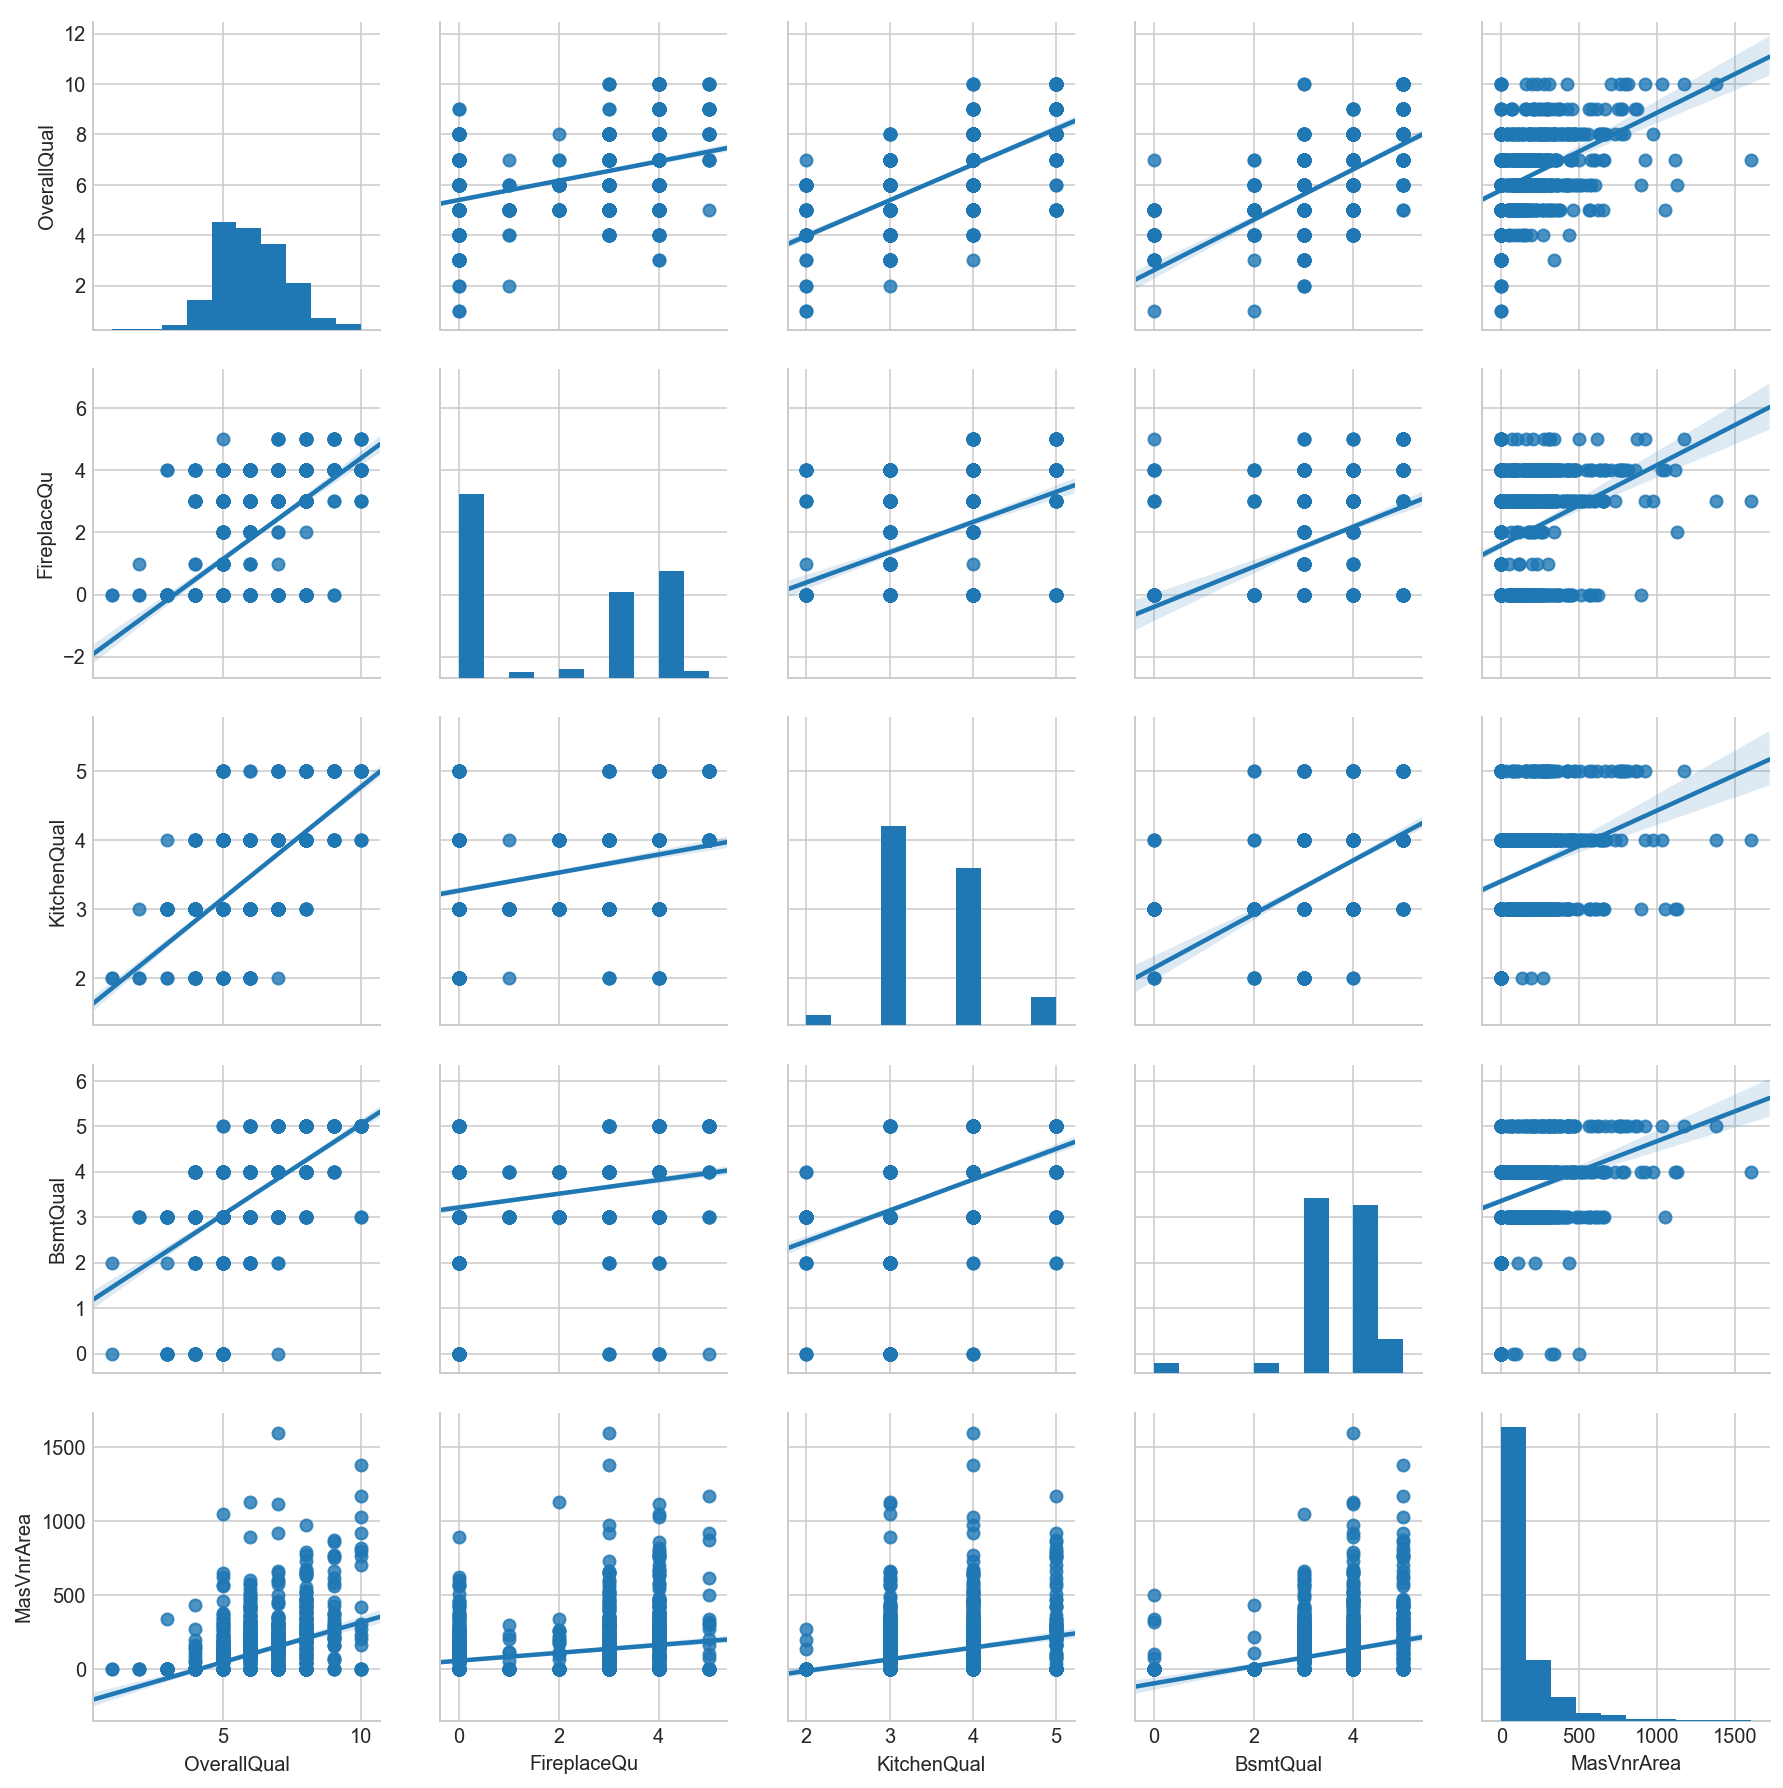

In [233]:
# this is defined in cell below so run that first
sns.pairplot(houserpredtr1,kind='reg')

### General positive trend in relationship between overall quality and these 4  features
### Trying regression with just these 4 features that are renovatable, plus the overall quality feature

In [234]:
# training data from before 2010
houserpredtr1 = houser3[houser3['YrSold']!=2010][['OverallQual','FireplaceQu','KitchenQual','BsmtQual','MasVnrArea']]
housertargettr1 = houser3[houser3['YrSold']!=2010][['Saleunexplainedeffect']]
# training data from before 2010
houserpredtt1 = houser3[houser3['YrSold']==2010][['OverallQual','FireplaceQu','KitchenQual','BsmtQual','MasVnrArea']]
housertargettt1 = houser3[houser3['YrSold']==2010][['Saleunexplainedeffect']]

In [235]:
# scaling the data
ss = StandardScaler()
Xsrenotr1 = ss.fit_transform(houserpredtr1)
Xsrenott1 = ss.fit_transform(houserpredtt1)

In [236]:
# initial R2 score of the model
lr = LinearRegression()
lr.fit(Xsrenotr1, housertargettr1)
lr.score(Xsrenott1, housertargettt1)

0.7334323994171233

In [237]:
# cross validating the model
scores = cross_val_score(lr, Xsrenotr1, housertargettr1, cv=10)
print "Cross-validated scores:", scores
print "Mean CV R2:", np.mean(scores)
print 'Std CV R2:', np.std(scores)
    

predictions = cross_val_predict(lr, Xsrenott1, housertargettt1, cv=10)
    
r2 = metrics.r2_score(housertargettt1, predictions)
print "Cross-Predicted R2:", r2

Cross-validated scores: [0.71237946 0.74777519 0.72823137 0.67652762 0.70464636 0.70085413
 0.70618253 0.67858338 0.5946539  0.732899  ]
Mean CV R2: 0.6982732946404335
Std CV R2: 0.040562576333360766
Cross-Predicted R2: 0.7098427065354149


### Cross-val R2 value is now ~70%, so stick to just these 4 features in the final model plus the resultant overall quality feature

In [238]:
# using statsmodel to get estimate of dollar value of renovations
# scoring is done on training data
model = sm.OLS(housertargettr1, houserpredtr1).fit()
#predictions = model.predict(Xsrenotr1)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Saleunexplainedeffect   R-squared:                       0.943
Model:                               OLS   Adj. R-squared:                  0.943
Method:                    Least Squares   F-statistic:                     4260.
Date:                   Thu, 05 Apr 2018   Prob (F-statistic):               0.00
Time:                           22:12:59   Log-Likelihood:                -13649.
No. Observations:                   1284   AIC:                         2.731e+04
Df Residuals:                       1279   BIC:                         2.733e+04
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
OverallQual  4413.6292    328.214     13.447      0.000    3769.732    5057.526
FireplaceQu  2022.6119    174.008     11.624      0.000    1681.239    2363.985
KitchenQual   741.3339    500.505      1.481      0.139    -240.567    1723.235
BsmtQual     1082.5927    409.036      2.647      0.008     280.139    1885.047
MasVnrArea     19.5654      1.624     12.044      0.000      16.378      22.752
==============================================================================
Omnibus:                      672.358   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10761.044
Skew:                           2.045   Prob(JB):                         0.00
Kurtosis:                      16.580   Cond. No.                         427.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Coefficients in table above indicate dollar value of improving the feature (by 1 rating/measure). Do note that the coefficient of overall quality is derived from that of the other features, ir overall quality cannot be improved in and on itself independently

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

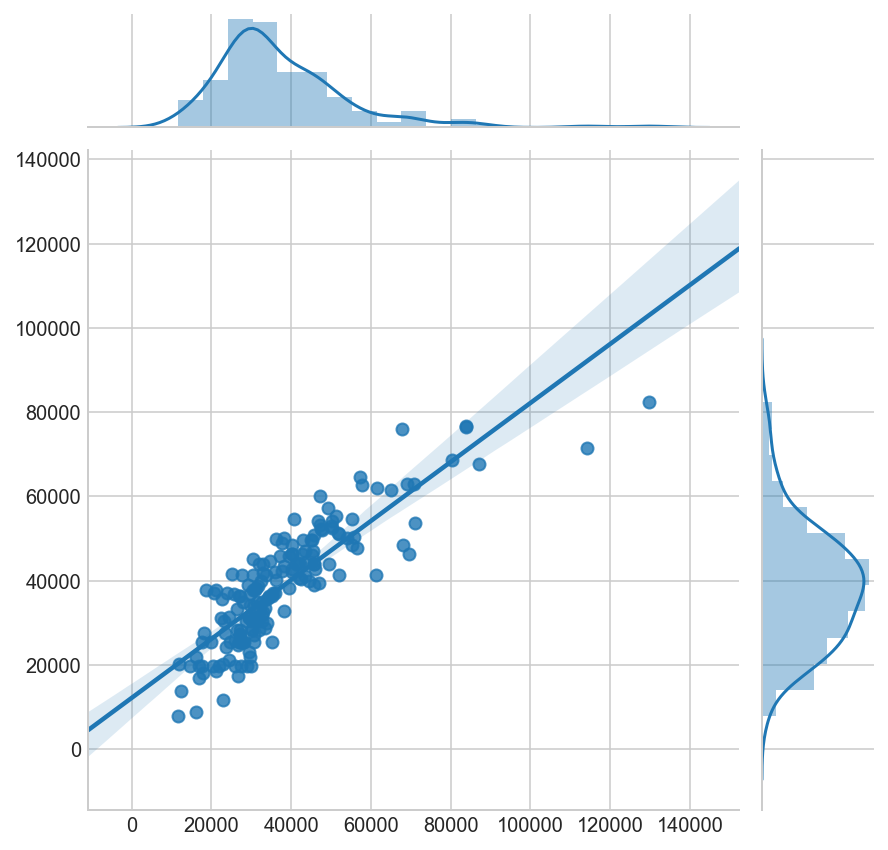

In [239]:
# overall plot of final model
yhat = lr.predict(Xsrenott1)
sns.jointplot(housertargettt1, yhat, kind="reg")

### The company should choose to purchase houses with low ratings/attributes in these categories (provided that the asking price is below the price predicted by the first model) and then renovate these features so as to complete a quick flip and earn an easy profit

### My level of trust in this second model is not particularly high for the following reasons:
### 1) There may be other contributors to the unexplained deviation in price even if model 1 was entirely accurate, ie haunted/spooked houses and other attributes not captured in original data
### 2) Cost of doing up renovations varies by renovation type, and this has not been factored in even if the labour for renovation is cheap
### 3) Economy wide factors such as lending rates, income growth etc may impact overall attractiveness of housing market and willingness of buyers to spend on posh/done-up features that are of higher quality

### Once again if time allows, some optimisation and re-iterating with different combinations of variables might provide for better results

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

### Investigate how imbalanced classes are

In [240]:
house['SaleCondition'].value_counts() # we only care about the abnormal category of housing

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

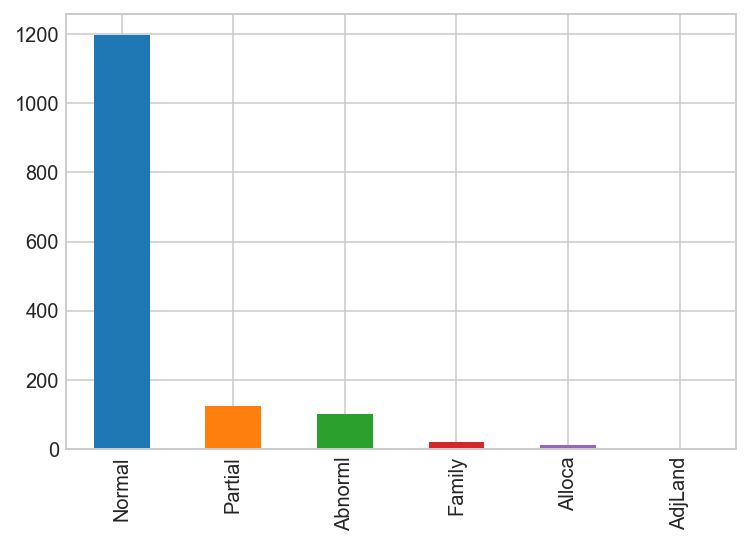

In [255]:
house['SaleCondition'].value_counts().plot(kind='bar')

In [256]:
# Calculating baseline accuracy
1198.0/house['SaleCondition'].count() # baseline is about 82%

0.8205479452054795

### Given that the imbalances appears to be largely a result of the Normal category
### Let's down sample this category to reduce its overall weightage

In [257]:
from sklearn.utils import resample

In [258]:
# creating subset with and without Normal category
housennormal = house[house['SaleCondition']!='Normal']
housenormal = house[house['SaleCondition']=='Normal']

In [259]:
df_majority_downsampled = resample(housenormal, 
                                 replace=False,    # sample without replacement
                                 n_samples=125,     # to match highest minority class of 125
                                 random_state=123)

In [260]:
# combining both dataframes to create single dataframe again
houseresampled = pd.concat([df_majority_downsampled, housennormal])
houseresampled['SaleCondition'].value_counts()

Normal     125
Partial    125
Abnorml    101
Family      20
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64

In [261]:
houseresampled.shape

(387, 81)

### Beginning analysis with resampled data

In [262]:
# Calculating baseline accuracy
125.0/houseresampled['SaleCondition'].count() # baseline is now about 32%

0.32299741602067183

In [263]:
# some feature engineering to recreate work done in parts 1/2
houseresampled['YearBuilt'] = houseresampled['YearBuilt'] - 1872
houseresampled['GarageYrBlt'] = houseresampled['GarageYrBlt'] - 1872
houseresampled['GarageYrBlt'] = houseresampled['GarageYrBlt'].fillna(0)
houseresampled['YearRemodAdd'] = houseresampled['YearRemodAdd'] - 1872
houseresampled['LotFrontage'] = houseresampled['LotFrontage'].fillna(0)
houseresampled.drop(columns='MiscFeature',axis=1,inplace=True)

In [264]:
# converting the sale condition category into numerical variables
houseresampled['NumSaleCondition'] = houseresampled.SaleCondition.replace({'Normal' : 1, 'Partial' : 2, 'Abnorml' : 3,\
                                                       'Family' : 4, 'Alloca' : 5, 'AdjLand' : 6})
houseresampled['NumSaleCondition'].value_counts()

2    125
1    125
3    101
4     20
5     12
6      4
Name: NumSaleCondition, dtype: int64

In [265]:
houseresampled.shape

(387, 81)

In [266]:
houseresampled.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NumSaleCondition
191,192,60,RL,0.0,7472,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,2Story,7,9,100,132,Gable,CompShg,HdBoard,HdBoard,BrkFace,138.0,TA,TA,CBlock,TA,TA,No,ALQ,626,Unf,0,99,725,GasA,Gd,Y,SBrkr,725,754,0,1479,1,0,1,1,4,1,Gd,7,Typ,0,NaN,Attchd,100.0,Fin,2,484,TA,TA,Y,0,32,0,0,0,0,NaN,NaN,0,6,2007,WD,Normal,184000,1
891,892,60,RL,70.0,11184,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,2Story,6,5,106,106,Hip,CompShg,HdBoard,HdBoard,BrkFace,92.0,TA,TA,CBlock,TA,TA,No,LwQ,226,Rec,500,192,918,GasA,Gd,Y,SBrkr,918,765,0,1683,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,106.0,RFn,2,440,TA,TA,Y,243,0,0,0,0,0,NaN,NaN,0,7,2009,WD,Normal,172500,1
1054,1055,60,RL,90.0,11367,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,130,130,Gable,CompShg,VinylSd,VinylSd,BrkFace,210.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,932,Unf,0,133,1065,GasA,Ex,Y,SBrkr,1091,898,0,1989,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,130.0,Fin,2,586,TA,TA,Y,199,60,0,0,0,0,NaN,NaN,0,11,2006,WD,Normal,255000,1
1292,1293,70,RM,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,4,20,93,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Stone,TA,TA,No,Unf,0,Unf,0,994,994,GasA,TA,N,SBrkr,1378,994,0,2372,0,0,2,0,4,2,TA,11,Min2,0,NaN,Attchd,113.0,RFn,1,432,TA,TA,Y,0,287,0,0,0,0,NaN,NaN,0,12,2009,WD,Normal,107500,1
44,45,20,RL,70.0,7945,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,87,87,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,179,BLQ,506,465,1150,GasA,Ex,Y,FuseA,1150,0,0,1150,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,87.0,RFn,1,300,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,0,5,2006,WD,Normal,141000,1


In [267]:
# doing initial analysis on which predictors might be relevant
corr = houseresampled.corr()
corr.sort_values(['NumSaleCondition'], ascending = False, inplace = True)
print(corr.NumSaleCondition)

NumSaleCondition    1.000000
KitchenAbvGr        0.204963
BsmtHalfBath        0.118561
MSSubClass          0.103688
PoolArea            0.079277
LowQualFinSF        0.073960
EnclosedPorch       0.056924
BedroomAbvGr        0.021492
MoSold              0.009797
BsmtFullBath        0.008881
TotRmsAbvGrd        0.001707
1stFlrSF           -0.001460
BsmtFinSF1         -0.014998
BsmtFinSF2         -0.021658
ScreenPorch        -0.037858
3SsnPorch          -0.042670
LotFrontage        -0.048013
Id                 -0.051592
YrSold             -0.051813
FullBath           -0.051871
GrLivArea          -0.059431
LotArea            -0.074266
MasVnrArea         -0.074545
Fireplaces         -0.081110
MiscVal            -0.081519
2ndFlrSF           -0.084669
BsmtUnfSF          -0.091305
OpenPorchSF        -0.095351
TotalBsmtSF        -0.109854
HalfBath           -0.111788
OverallCond        -0.116990
WoodDeckSF         -0.137106
GarageCars         -0.138618
GarageArea         -0.154019
SalePrice     

### Based on correlations above, in general:
### Features with +ve correlation are positive predictors of abnormal values
### Whilst features with -ve correlation are negative predictors of abnormal values


In [268]:
# ignore this
# testing to see which method of converting categorical variables is better
# houseresampled1 = pd.get_dummies(houseresampled, columns=['SaleCondition'],prefix='cond')
# houseresampled1.head()

In [269]:
# ignore this
# testing to see which method of converting categorical variables is better
# corr = houseresampled1.corr()
# corr.sort_values(['cond_Abnorml'], ascending = False, inplace = True)
# print(corr.cond_Abnorml)

### Proceeding to do the modelling using the features listed below selected based on correlation values
### Features with relevant correlations above |0.1| have been selected

In [270]:
# assigning predictors based on the features with the highest positive/negative correlations
# ['YearRemodAdd','BsmtHalfBath','GarageCars','OverallQual','GarageYrBlt','YearBuilt, 'KitchenAbvGr']

In [271]:
# training data from pre-2010
RXtr = houseresampled[houseresampled['YrSold']!=2010][['YearRemodAdd','BsmtHalfBath','GarageCars','OverallQual',\
                                                         'GarageYrBlt','YearBuilt','KitchenAbvGr']]
RYtr = houseresampled[houseresampled['YrSold']!=2010][['NumSaleCondition']]

In [272]:
# testing data from 2010
RXtt = houseresampled[houseresampled['YrSold']==2010][['YearRemodAdd','BsmtHalfBath','GarageCars','OverallQual',\
                                                         'GarageYrBlt','YearBuilt','KitchenAbvGr']]
RYtt = houseresampled[houseresampled['YrSold']==2010][['NumSaleCondition']]

In [273]:
#knn = KNeighborsClassifier(n_neighbors=1)
#knn.fit(RX, RY)

In [274]:
# standardising predictor matrix
ss = StandardScaler()
RXtrs = ss.fit_transform(RXtr)
RXtts = ss.fit_transform(RXtr)

### Does the y (target) value need to be scaled as well? Proceeding with non-scaled values for now
### Using KNN model to predict classification

In [275]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [276]:
#X_train, X_test, y_train, y_test = train_test_split(RX, RY, random_state=99, test_size=0.5)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(RXtr, RYtr)

y_pred_class = knn.predict(RXtt)
print ('accuracy = {}'.format(metrics.accuracy_score(RYtt, y_pred_class)))

accuracy = 0.361111111111


C:\Users\arb_b\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


### Accuracy of ~36% is not much different from baseline
### Experimenting with different k values

In [277]:
# varying the number of k from 0 to 20 and plotting
test_acc = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(RXtr, RYtr)
    test_acc.append(knn.score(RXtt, RYtt))

C:\Users\arb_b\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


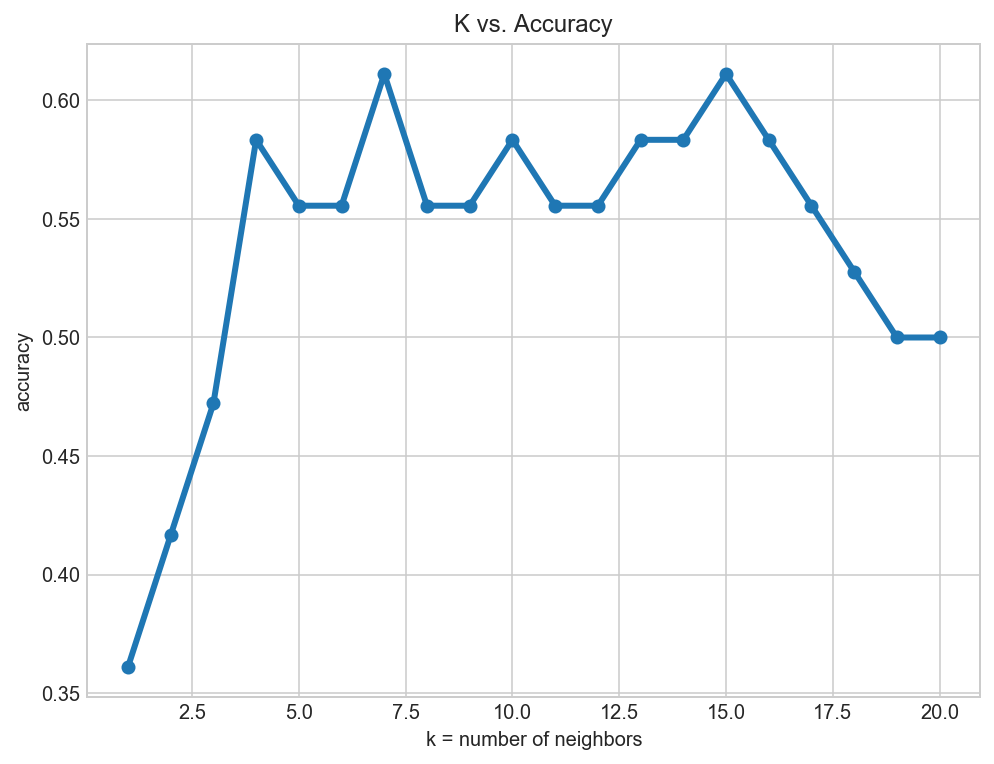

In [278]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, 21), test_acc, lw=3., marker='o')
plt.xlabel('k = number of neighbors')
plt.ylabel('accuracy')
plt.title('K vs. Accuracy')
plt.show()

### Highest accuracy appears to be about 62% with k = 15

### Repeating process but with cross validation

In [279]:
# using 5 folds in the cross validation model

test_acc = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc.append(np.mean(cross_val_score(knn, RXtr, RYtr, cv=5)))

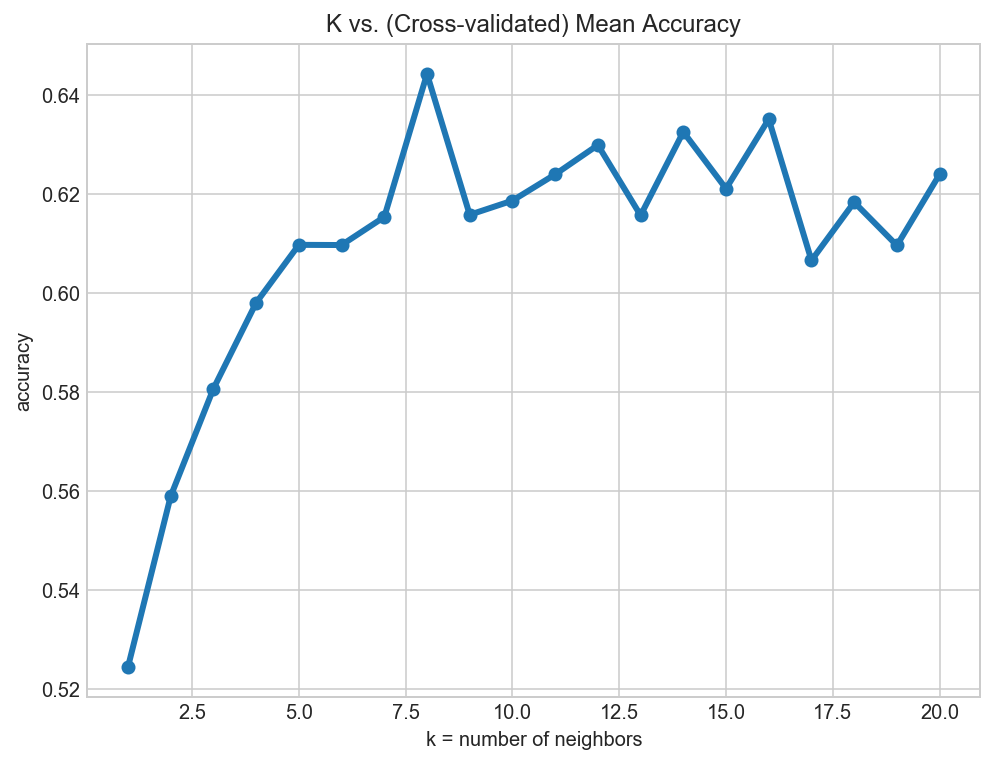

In [280]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, 21), test_acc, lw=3., marker='o')
plt.xlabel('k = number of neighbors')
plt.ylabel('accuracy')
plt.title('K vs. (Cross-validated) Mean Accuracy')
plt.show()

### Highest accuracy appears to be about 65% with k = 8

### Trying logistic regression

In [281]:
from sklearn.linear_model import LogisticRegression

In [282]:
logit = LogisticRegression(penalty='l2',C=1.0,random_state=123, solver='liblinear',multi_class='ovr')
model = logit.fit(RXtr, RYtr)

In [283]:
model.predict(RXtt)

array([3, 2, 1, 1, 3, 1, 2, 1, 1, 3, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 2, 3,
       1, 3, 1, 1, 1, 3, 2, 2, 2, 1, 3, 1, 1, 1], dtype=int64)

In [284]:
model.score(RXtt, RYtt)

0.5

### Without further optimisation, this specific model of logistic regression is only 50% accurate

In [285]:
# ignore this
# temp placeholder for logit regression using patsy
#f = '''
#SalePrice ~ YearBuilt + GarageYrBlt + OverallQual + GarageCars + EnclosedPorch + YearRemodAdd
#'''
#news_model = sm.logit(f, data=RX2).fit()
#news_model.summary()

### Try SVM

In [286]:
from sklearn import svm

In [287]:
# note only linearsvc appears to be valid for one versus many classification
lin_clf = svm.LinearSVC(C=1.0, class_weight=None,  loss='squared_hinge', max_iter=1000,\
     multi_class='ovr', penalty='l2', random_state=123, verbose=0)
lin_clf.fit(RXtr, RYtr)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=123, tol=0.0001,
     verbose=0)

In [288]:
lin_clf.score(RXtt, RYtt)

0.2777777777777778

### This version of SVM is even worse than baseline with accuracy of ~28%, clearly some form of optimisation is required for SVM to be considered as a viable model

### Initial findings on features which are predictive of abnormal sale (based on results from knn) are as follows:
### Positive Predictors - Kitchen's above grade and basement half bathrooms
### Negative Predictors - Year built (for different parts of house) or remodelled, ie the newer the house the better

### For any of these models to be really considered, a much higher accuracy would be desirable. More time needs to be spent to obtain such a model.

### Next step to improve accuracy consists of a few parts:
### 1) varying the predictors used in the model, and including categorical variables as appropriate
### 2) optimising the model by changing the model parameters (for logistic regression and SVM)
### 3) repeating the entire process using other methods to deal with class imbalance including up-sampling the minority classes and other techniques not taught yet